# Want to make a pattern with a centered cross and the letters N,E,S,W at each end.

Instead of a uniform grid of points, this way we can tell if the image is flipped relative to how light hits the DMD.



In [1]:
import numpy as np
import pandas as pd

import astropy.units as u
from astropy import coordinates, units as u, wcs
from astropy.io.votable import parse
from astropy.table import Table, Column, QTable
from astropy.io import fits
from astropy.visualization import simple_norm


from ipyaladin import Aladin
from ipywidgets import Layout, Box, widgets
import ipyaladin.aladin_widget as ipyal
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from astroquery.gaia import Gaia
from astroquery.vizier import Vizier

from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.nddata import CCDData
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon


import importlib 

from skimage import transform


%matplotlib notebook

%config Completer.use_jedi = False

In [36]:
import PIL

(2048/4)+40


552.0

In [37]:

from PIL import Image, ImageDraw, ImageFont


dmdarr = np.zeros((2048,1080))
im = Image.fromarray(dmdarr,mode="1")

#txt = Image.new("RGBA",)
yoffset = 2048/4
print(im.size)
im1 = ImageDraw.Draw(im)
l1 = im1.line([(40,540+yoffset),(1040,540+yoffset)],width=5,fill=1)
l2 = im1.line([(540,55+yoffset),(540,1040+yoffset)],width=5,fill=1)

#im.show()

#font = ImageFont.truetype("/Library/Fonts/Arial Unicode.ttf",40)#ImageFont.load_default()
font = ImageFont.truetype("Arial",40)#ImageFont.load_default()


tS = im1.text((530,1030+yoffset),"S",fill=2,font=font)
tE = im1.text((1030,540+yoffset),"E",fill=2,font=font)
tN = im1.text((530,10+yoffset),"N",fill=2,font=font)
tW = im1.text((30,540+yoffset),"W",fill=2,font=font,)


#out.show()
#im.paste(d.im,(530,1050,550,1070))

#im.show()

(1080, 2048)


<IPython.core.display.Javascript object>


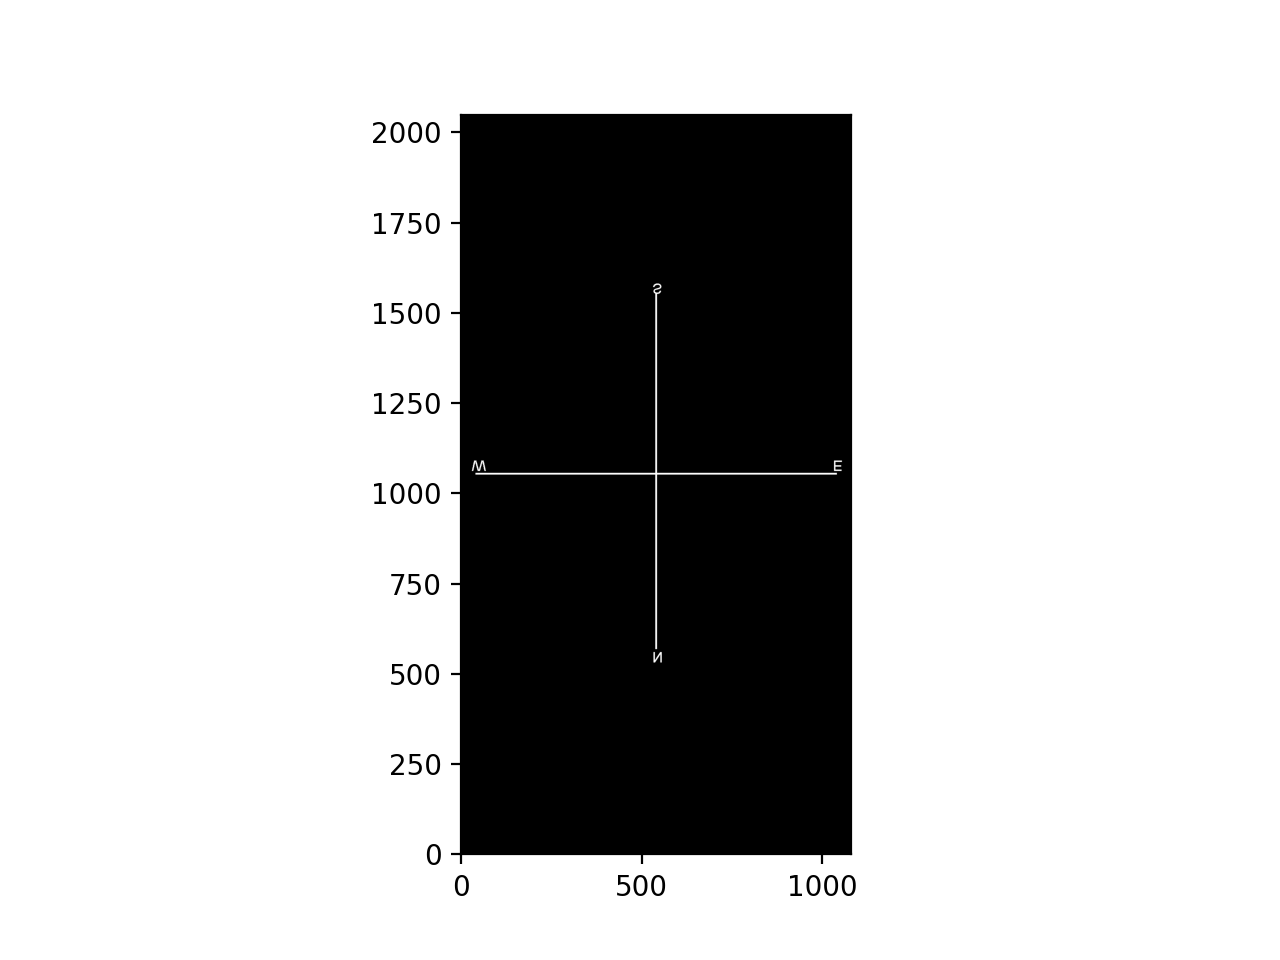

In [38]:
sim = np.asarray(im.convert("L"))

sim1 = Image.fromarray(sim.astype('uint8'),mode='L')


plt.imshow(sim1,origin='lower',cmap='gray')

In [39]:
sim1.save('../Patterns/crosshair.png',format='bmp')

im = Image.fromarray(sim.astype(np.uint8))
im.save('../Patterns/crosshair.bmp')

In [6]:
sim1 = sim.copy()
for r in range(sim.shape[0]):
    for c in range(sim.shape[1]):
        
        if sim[r,c]:
            sim1[r,c]=1
        else:
            sim1[r,c]=0
            
sim1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

False